In [2]:
# create a dataframe of the annotated dataset in the folder ..data/CodeQualData/py800_annotated
import os
import pandas as pd
import json

data = []
for root, dirs, files in os.walk('../data/CodeQualData/py800_annotated'):
    for file in files:
        if file.endswith(".jsonl"):
            with open(os.path.join(root, file), 'r') as f:
                for line in f:
                    data.append(json.loads(line))

#order by descending order of size
py800_annotated_df = pd.DataFrame(data)
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py..."
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py..."
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py..."
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py..."
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py..."
...,...,...,...,...,...
717,p03095,s337828734,You are given a string S of length N.\nAmong i...,{'functionality': 'The code correctly counts t...,"{'functionality': '5', 'readability': '5', 'py..."
718,p02711,s627609294,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code reads a three-digi...,"{'functionality': '5', 'readability': '5', 'py..."
719,p02711,s880296625,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code checks for the pre...,"{'functionality': '5', 'readability': '5', 'py..."
720,p02711,s261077690,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code receives a three-d...,"{'functionality': '5', 'readability': '5', 'py..."


In [5]:
# get all distinct problems from py800_annotated_df
problems = py800_annotated_df['problem_id'].unique()
problems.tofile('../data/CodeQualData/problems.txt', sep='\n', format='%s')

In [75]:
# get all the submissions in the python_800 dataset
import os
import pandas as pd
py_800_dir = '../data/CodeNet/python_800'

def read_file(file):
    with open(file, 'r') as f:
        return f.read()

data = []
for root, dirs, files in os.walk(py_800_dir):
    for file in files:
        if file.endswith(".py"):
            data.append({'problem_id': root.split('/')[-1], 'submission_id': file.strip('.py'), 'submission': read_file(os.path.join(root, file))})
py800_df = pd.DataFrame(data)
py800_df

,problem_id,submission_id,submission
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...
239995,p02991,s289199974,import sys\ninput = sys.stdin.buffer.readline\...
239996,p02991,s007313054,"from collections import deque\n\nn, m = map(i..."
239997,p02991,s209638769,from collections import defaultdict as dd\nfro...
239998,p02991,s447876624,import sys\nfrom collections import deque\n\n\...


In [76]:
# merge the two dataframes by problem_id and submission_id
py800_annotated_df = pd.merge(py800_annotated_df, py800_df, on=['problem_id', 'submission_id'])
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score,submission
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py...","n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py...",s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py...",def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py...","a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py...","N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...,...,...,...
717,p03095,s337828734,You are given a string S of length N.\nAmong i...,{'functionality': 'The code correctly counts t...,"{'functionality': '5', 'readability': '5', 'py...",from collections import Counter\n\nn = int(inp...
718,p02711,s627609294,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code reads a three-digi...,"{'functionality': '5', 'readability': '5', 'py...",S=list(input())\n\nans='No'\nfor s in S:\n ...
719,p02711,s880296625,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code checks for the pre...,"{'functionality': '5', 'readability': '5', 'py...","n=str(input())\nprint(""YNeos""[not ""7"" in n::2])"
720,p02711,s261077690,Given is a three-digit integer N. Does N conta...,{'functionality': 'The code receives a three-d...,"{'functionality': '5', 'readability': '5', 'py...",print('Yes' if '7' in input() else ('No'))


In [77]:
# create a dataframe from jsonl file
prob_desc_df = pd.read_json('../data/CodeQualData/py800_metadata_problem_desc.jsonl', lines=True)
def get_problem_desc(problem_id):
    row = prob_desc_df[prob_desc_df['problem_id'] == problem_id]
    return row.values[0][1]

In [78]:
# for each row in py800_annotated_df extract the problem_id, submission_id, and the quality score

data = []
for index, row in py800_annotated_df.iterrows():
    temp_dict = {'problem_id': row['problem_id'], 'problem': get_problem_desc(row['problem_id']), 'submission_id': row['submission_id'], 'submission': row['submission']}
    temp_dict.update(row['quality_score'])
    data.append(temp_dict)

# create a dataframe from the data
py800_annotated_df_score = pd.DataFrame(data)
py800_annotated_df_score



,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4,3,3,1,4
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3,4,3,2,3
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4,3,4,1,4
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3,3,2,1,2
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4,3,3,1,4
...,...,...,...,...,...,...,...,...,...
717,p03095,You are given a string S of length N.\nAmong i...,s337828734,from collections import Counter\n\nn = int(inp...,5,5,5,3,5
718,p02711,Given is a three-digit integer N. Does N conta...,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5,5,5,N/A,5
719,p02711,Given is a three-digit integer N. Does N conta...,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5,5,5,4,5
720,p02711,Given is a three-digit integer N. Does N conta...,s261077690,print('Yes' if '7' in input() else ('No')),5,5,5,4,5


In [79]:
# convert values in columns to integers, and do some clean up
py800_annotated_df_score.replace('N/A', 5, inplace=True)
py800_annotated_df_score.replace('NA', 5, inplace=True)
py800_annotated_df_score['functionality'] = py800_annotated_df_score['functionality'].astype(float)
py800_annotated_df_score['readability'] = py800_annotated_df_score['readability'].astype(float)
py800_annotated_df_score['pythonic'] = py800_annotated_df_score['pythonic'].astype(float)
py800_annotated_df_score['efficiency'] = py800_annotated_df_score['efficiency'].astype(float)
py800_annotated_df_score['error_handling'] = py800_annotated_df_score['error_handling'].astype(float)
py800_annotated_df_score.dtypes


problem_id         object
problem            object
submission_id      object
submission         object
functionality     float64
readability       float64
pythonic          float64
error_handling    float64
efficiency        float64
dtype: object

In [80]:
# create a new column that contains the average of the quality scores for each submission using
# the columns functionality, readability, pythonic, efficiency, and error_handling
py800_annotated_df_score['average'] = py800_annotated_df_score[['functionality', 'readability', 'pythonic', 'efficiency', 'error_handling']].mean(axis=1)
py800_annotated_df_score


,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
717,p03095,You are given a string S of length N.\nAmong i...,s337828734,from collections import Counter\n\nn = int(inp...,5.0,5.0,5.0,3.0,5.0,4.6
718,p02711,Given is a three-digit integer N. Does N conta...,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5.0,5.0,5.0,5.0,5.0,5.0
719,p02711,Given is a three-digit integer N. Does N conta...,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5.0,5.0,5.0,4.0,5.0,4.8
720,p02711,Given is a three-digit integer N. Does N conta...,s261077690,print('Yes' if '7' in input() else ('No')),5.0,5.0,5.0,4.0,5.0,4.8


In [81]:
# label the average quality score as good, average, or bad using the average column
def label_quality(row):
    if row['average'] >= 4.5:
        return 'HIGH'
    elif row['average'] >= 3.5 and row['average'] < 4.5:
        return 'AVERAGE'
    else:
        return 'LOW'
    
py800_annotated_df_score['quality'] = py800_annotated_df_score.apply(lambda row: label_quality(row), axis=1)
py800_annotated_df_score


,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average,quality
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0,LOW
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0,LOW
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2,LOW
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2,LOW
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0,LOW
...,...,...,...,...,...,...,...,...,...,...,...
717,p03095,You are given a string S of length N.\nAmong i...,s337828734,from collections import Counter\n\nn = int(inp...,5.0,5.0,5.0,3.0,5.0,4.6,HIGH
718,p02711,Given is a three-digit integer N. Does N conta...,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5.0,5.0,5.0,5.0,5.0,5.0,HIGH
719,p02711,Given is a three-digit integer N. Does N conta...,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5.0,5.0,5.0,4.0,5.0,4.8,HIGH
720,p02711,Given is a three-digit integer N. Does N conta...,s261077690,print('Yes' if '7' in input() else ('No')),5.0,5.0,5.0,4.0,5.0,4.8,HIGH


In [82]:
# group the number of submissions by quality
py800_annotated_df_score.groupby('quality').size()

quality
AVERAGE    353
HIGH        98
LOW        271
dtype: int64

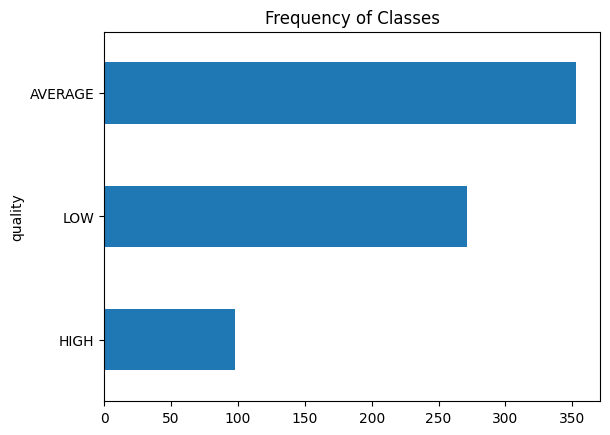

In [83]:
import matplotlib.pyplot as plt

py800_annotated_df_score["quality"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [84]:
# how long are the submissions
py800_annotated_df_score['submission_length'] = py800_annotated_df_score['submission'].apply(lambda x: len(x.split()))
py800_annotated_df_score['submission_length'].describe()

count    722.000000
mean      41.566482
std       35.494590
min        1.000000
25%       20.000000
50%       35.000000
75%       48.000000
max      326.000000
Name: submission_length, dtype: float64

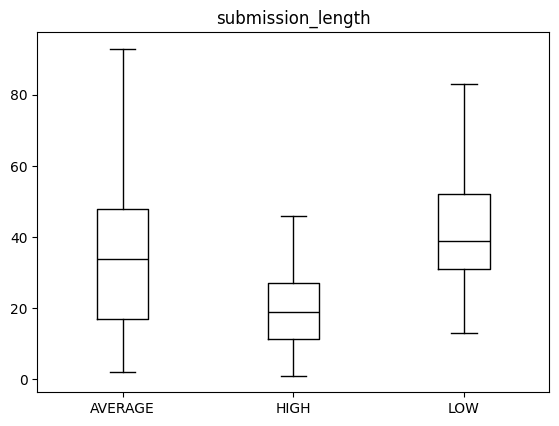

In [85]:
import matplotlib.pyplot as plt
py800_annotated_df_score.boxplot("submission_length", by="quality", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [86]:
# add a label to the dataframe based on the quality score: low, average, or high
py800_annotated_df_score['label'] = py800_annotated_df_score['quality'].apply(lambda x: 0 if x == 'LOW' else (1 if x == 'AVERAGE' else 2))
py800_annotated_df_score

,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average,quality,submission_length,label
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,14,0
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0,LOW,64,0
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2,LOW,21,0
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2,LOW,49,0
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,p03095,You are given a string S of length N.\nAmong i...,s337828734,from collections import Counter\n\nn = int(inp...,5.0,5.0,5.0,3.0,5.0,4.6,HIGH,28,2
718,p02711,Given is a three-digit integer N. Does N conta...,s627609294,S=list(input())\n\nans='No'\nfor s in S:\n ...,5.0,5.0,5.0,5.0,5.0,5.0,HIGH,11,2
719,p02711,Given is a three-digit integer N. Does N conta...,s880296625,"n=str(input())\nprint(""YNeos""[not ""7"" in n::2])",5.0,5.0,5.0,4.0,5.0,4.8,HIGH,5,2
720,p02711,Given is a three-digit integer N. Does N conta...,s261077690,print('Yes' if '7' in input() else ('No')),5.0,5.0,5.0,4.0,5.0,4.8,HIGH,7,2


get frequencies of values in cc_label column excluding NaN
cc_label
2.0    160
1.0     20
0.0      1
Name: count, dtype: int64
get frequencies of values in he_label column excluding NaN
he_label
0.0    529
1.0    106
2.0     85
Name: count, dtype: int64
[0.         0.66666667 1.33333333 2.        ]


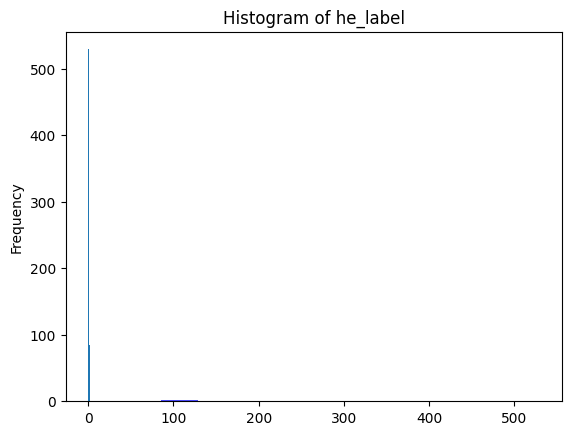

     label  cc_label  mi_label  he_label
207      0       NaN       1.0       0.0
439      1       NaN       1.0       0.0
346      2       2.0       2.0       1.0
327      2       NaN       1.0       1.0
265      0       2.0       1.0       0.0
576      1       NaN       1.0       2.0
0        0       NaN       1.0       0.0
639      1       NaN       2.0       0.0
50       0       NaN       1.0       0.0
57       0       NaN       1.0       0.0
223      1       NaN       1.0       0.0
69       0       NaN       1.0       0.0
498      0       2.0       1.0       0.0
402      0       NaN       0.0       0.0
59       0       NaN       1.0       0.0
24       1       NaN       1.0       0.0
172      0       NaN       1.0       0.0
607      2       NaN       2.0       2.0
325      2       NaN       1.0       1.0
383      1       NaN       1.0       0.0
Number of NaN values in column cc: 541
Number of non-NaN values in column cc: 181
Number of NaN values in column cc: 541
    problem_id    

In [88]:
# get cyclomatic complexity for each submission
from radon.complexity import cc_rank, cc_visit
from radon.metrics import mi_visit, h_visit
import numpy as np
def get_cc(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    1 - 5	A (low risk - simple block)
    6 - 10	B (low risk - well structured and stable block)
    11 - 20	C (moderate risk - slightly complex block)
    """
    label = None
    try:
        cc = cc_visit(code)[0].complexity
        if cc <= 5:
            label = 2
        if cc > 5 and cc <=10:
            label = 1
        if cc > 10:
            label = 0
    except:
        return label
    return label

def get_mi(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    20-100 unmaintainable
    26-50 cause for concern
    51-75 needs improvement
    76-100 good
    """
    label = None
    try:
        mi = mi_visit(code, False)
        if mi <= 50:
            label = 0
        if mi > 50 and mi <=75:
            label = 1
        if mi > 75:
            label = 2
    except:
        return label
    return label

def get_he(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    """
    res = None
    try:
        res = h_visit(code).total.effort
        if res < 20:
            res = 2
        if res >= 20 and res < 80:
            res = 1
        if res >= 80:
            res = 0
    except:
        return res
    return res

py800_annotated_df_score['cc_label'] = py800_annotated_df_score['submission'].apply(get_cc)
py800_annotated_df_score['mi_label'] = py800_annotated_df_score['submission'].apply(get_mi)
py800_annotated_df_score['he_label'] = py800_annotated_df_score['submission'].apply(get_he)
print("get frequencies of values in cc_label column excluding NaN")
cc_frequencies = py800_annotated_df_score['cc_label'].value_counts()
print(cc_frequencies)
print("get frequencies of values in he_label column excluding NaN")
he_frequencies = py800_annotated_df_score['he_label'].value_counts()
print(he_frequencies)
# plot he_frequency distribution
he_frequencies.plot(kind='hist', bins=10, title='Histogram of he_label', color='blue', alpha=0.7)
# get range for each bin in the histogram
data = py800_annotated_df_score['he_label'].dropna()  # drop NaN values
# Calculate histogram and bin edges
hist, bin_edges = np.histogram(data, bins=3)
print(bin_edges)
plt.hist(data, bins=bin_edges)
# Set x-tick labels to bin ranges
# plt.xticks(bin_edges, [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(len(bin_edges-1))], rotation=45)
plt.show()

print(py800_annotated_df_score[['label', 'cc_label', 'mi_label', 'he_label']].sample(20))
# count the number of NaN in column cc
nan_count = py800_annotated_df_score['cc_label'].isna().sum()
print(f'Number of NaN values in column cc: {nan_count}')
not_nan_count = py800_annotated_df_score['cc_label'].count()
print(f'Number of non-NaN values in column cc: {not_nan_count}')
nan_count = py800_annotated_df_score['cc_label'].isna().sum()
print(f'Number of NaN values in column cc: {nan_count}')
# filter all NaN rows
corr_df = py800_annotated_df_score[py800_annotated_df_score['cc_label'].notna()]
print(corr_df)
from scipy import stats
# calculate the correlation coefficient
x = corr_df['label']
y_cc = corr_df['cc_label']
y_mi = corr_df['mi_label']
y_he = corr_df['he_label']

corr = stats.spearmanr(x, y_cc)
print(f"Spearman correlation coefficient with cc is: {corr.statistic}")
corr = stats.spearmanr(x, y_mi)
print(f"Spearman correlation coefficient with mi is: {corr.statistic}")
corr = stats.spearmanr(x, y_he)
print(f"Spearman correlation coefficient with he is: {corr.statistic}")



In [89]:
# split the above dataframe into train, validation, and test sets
from sklearn.model_selection import train_test_split
print("==Distribution of labels before split==")
print(py800_annotated_df_score.groupby('quality').size())
train, test = train_test_split(py800_annotated_df_score, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

print("==Shapes of the splits==")
print(f"Train size: {train.shape[0]}")
print(f"Validation size: {val.shape[0]}")
print(f"Test size: {test.shape[0]}")

print("==Distribution of labels after split==")
print("       Train set")
print(train.groupby('quality').size())
print("       Validation set")
print(val.groupby('quality').size())
print("       Test set")
print(test.groupby('quality').size())

==Distribution of labels before split==
quality
AVERAGE    353
HIGH        98
LOW        271
dtype: int64
==Shapes of the splits==
Train size: 461
Validation size: 116
Test size: 145
==Distribution of labels after split==
       Train set
quality
AVERAGE    219
HIGH        68
LOW        174
dtype: int64
       Validation set
quality
AVERAGE    60
HIGH       15
LOW        41
dtype: int64
       Test set
quality
AVERAGE    74
HIGH       15
LOW        56
dtype: int64


In [90]:
# save the dataframes to a json file
cols = ['problem_id', 'problem', 'submission_id', 'submission', 'label']
train[cols].to_json('../data/CodeQualData/train.jsonl', orient='records', lines=True)
val[cols].to_json('../data/CodeQualData/valid.jsonl', orient='records', lines=True)
test[cols].to_json('../data/CodeQualData/test.jsonl', orient='records', lines=True)


In [91]:
# load training set into huggingface dataset
from datasets import load_dataset, Features, Value, ClassLabel
data_files = {'train': '../data/CodeQualData/train.jsonl',
              'validation': '../data/CodeQualData/valid.jsonl', 
              'test': '../data/CodeQualData/test.jsonl'}
features = Features({'problem_id': Value(dtype='string', id=None),
                      'problem': Value(dtype='string', id=None),
                      'submission_id': Value(dtype='string', id=None),
                     'submission': Value(dtype='string', id=None), 
                     'label': ClassLabel(num_classes=3, names=['low', 'average', 'high'])
                     })
code_qual_dataset = load_dataset('json', data_files=data_files, features=features)
code_qual_dataset.save_to_disk('../data/CodeQualData/code_qual_dataset')
print(code_qual_dataset)
print(code_qual_dataset['train'].features)
print(code_qual_dataset['train'][0])

Generating train split: 461 examples [00:00, 148280.23 examples/s]
Generating validation split: 116 examples [00:00, 71602.54 examples/s]
Generating test split: 145 examples [00:00, 87469.31 examples/s]
Saving the dataset (1/1 shards): 100%|██████████| 145/145 [00:00<00:00, 55708.90 examples/s]

DatasetDict({
    train: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 461
    })
    validation: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 116
    })
    test: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 145
    })
})
{'problem_id': Value(dtype='string', id=None), 'problem': Value(dtype='string', id=None), 'submission_id': Value(dtype='string', id=None), 'submission': Value(dtype='string', id=None), 'label': ClassLabel(names=['low', 'average', 'high'], id=None)}
{'problem_id': 'p02546', 'problem': "In the Kingdom of AtCoder, people use a language called Taknese, which uses lowercase English letters.\nIn Taknese, the plural form of a noun is spelled based on the following rules:\n\nIf a noun's singular form does not end with s, append s to the end of the singular form.\nIf a noun's 

In [92]:
# load the above DatasetDict
from datasets import Dataset, DatasetDict, load_dataset
code_qual_dataset = DatasetDict.load_from_disk('../data/CodeQualData/code_qual_dataset')
print(code_qual_dataset)
print(code_qual_dataset['train'].features)

DatasetDict({
    train: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 461
    })
    validation: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 116
    })
    test: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 145
    })
})
{'problem_id': Value(dtype='string', id=None), 'problem': Value(dtype='string', id=None), 'submission_id': Value(dtype='string', id=None), 'submission': Value(dtype='string', id=None), 'label': ClassLabel(names=['low', 'average', 'high'], id=None)}


In [93]:
# learn about tokenizer
from transformers import AutoTokenizer

def tokenize(batch):
    return tokenizer(batch["submission"], padding=True, truncation=True)

model_name = "microsoft/codebert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.add_special_tokens({"pad_token": "[PAD]"})

codequal_encoded: DatasetDict = code_qual_dataset.map(tokenize, batched=True, batch_size=None)
print(codequal_encoded["train"].column_names)
print(codequal_encoded["train"][0])
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)
print(tokenizer.model_input_names)
tokens = tokenizer.convert_ids_to_tokens(codequal_encoded['train'][0]['input_ids'])
print(tokens)



Map: 100%|██████████| 145/145 [00:00<00:00, 6694.93 examples/s]

['problem_id', 'problem', 'submission_id', 'submission', 'label', 'input_ids', 'attention_mask']
{'problem_id': 'p02546', 'problem': "In the Kingdom of AtCoder, people use a language called Taknese, which uses lowercase English letters.\nIn Taknese, the plural form of a noun is spelled based on the following rules:\n\nIf a noun's singular form does not end with s, append s to the end of the singular form.\nIf a noun's singular form ends with s, append es to the end of the singular form.\n\nYou are given the singular form S of a Taknese noun. Output its plural form.", 'submission_id': 's733623091', 'submission': "S = input()\nif S[len(S)-1] == 's':\n    answer = S + 'es'\nelse:\n    answer = S + 's'\nprint(answer)\n", 'label': 2, 'input_ids': [0, 104, 5457, 8135, 43048, 50118, 1594, 208, 10975, 8476, 1640, 104, 19281, 134, 742, 45994, 128, 29, 13373, 50118, 1437, 1437, 1437, 1948, 5457, 208, 2055, 128, 293, 108, 50118, 44617, 35, 50118, 1437, 1437, 1437, 1948, 5457, 208, 2055, 128, 29, 